## General GPyOPt new way of use

In [1]:
%pylab inline
import GPyOpt
import GPy
from numpy.random import seed
seed(1234)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Problem definition
func      = GPyOpt.objective_examples.experiments2d.sixhumpcamel()

domain =[{'name': 'var_1', 'type': 'continuous', 'domain':func.bounds[0] },
        {'name': 'var_2', 'type': 'discrete', 'domain': func.bounds[1]}]

constrains = [
    {'name': 'constr_1', 'constrain': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
    {'name': 'constr_2', 'constrain': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

In [3]:
bo = GPyOpt.methods.BayesianOptimization(func.f,domain, cost_withGradients = 'evaluation_time', model_type='GP',acquisition_type ='EI',exact_feval = True)

In [4]:
# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance) 

*Optimization completed:


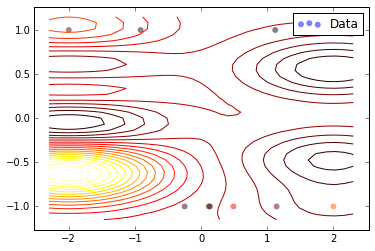

In [9]:
bo.cost.cost_model.model.plot()

In [9]:
bo.objective.evaluate(bo.X)

(array([[ 3.63249235],
        [ 0.35084461],
        [ 0.48926585],
        [ 1.24255304],
        [ 3.49098731]]),
 [0.00015997886657714844,
  9.703636169433594e-05,
  8.988380432128906e-05,
  9.202957153320312e-05,
  0.00011086463928222656])

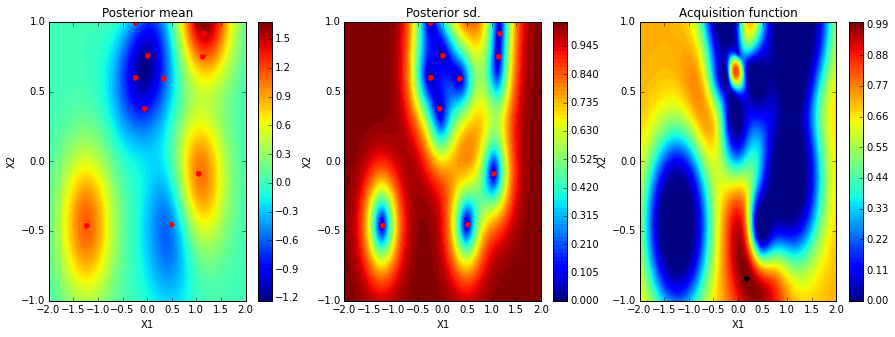

In [6]:
bo.plot_acquisition()